In [1]:
%matplotlib inline
import torch
from torch.utils.data import Dataset, DataLoader
from skimage.external import tifffile
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from torchvision_multi import transform_multi
from torchvision_multi.datasets import image_loader


## for jpg

(500, 334) uint8
(560, 394) uint8


(500, 334) uint8
(560, 394) uint8


torch.Size([2, 3, 560, 394])
<class 'numpy.ndarray'> (560, 394, 3)
<class 'numpy.ndarray'> (560, 394, 3)


target <class 'torch.LongTensor'> torch.Size([560, 394])
target <class 'torch.LongTensor'> torch.Size([560, 394])


(500, 334) uint8
(560, 394) uint8


(500, 334) uint8
(560, 394) uint8


torch.Size([2, 3, 560, 394])
<class 'numpy.ndarray'> (560, 394, 3)
<class 'numpy.ndarray'> (560, 394, 3)


target <class 'torch.LongTensor'> torch.Size([560, 394])
target <class 'torch.LongTensor'> torch.Size([560, 394])


(500, 334) uint8
(560, 394) uint8


(500, 334) uint8
(560, 394) uint8


torch.Size([2, 3, 560, 394])
<class 'numpy.ndarray'> (560, 394, 3)
<class 'numpy.ndarray'> (560, 394, 3)


target <class 'torch.LongTensor'> torch.Size([560, 394])
target <class 'torch.LongTensor'> torch.Size([560, 394])




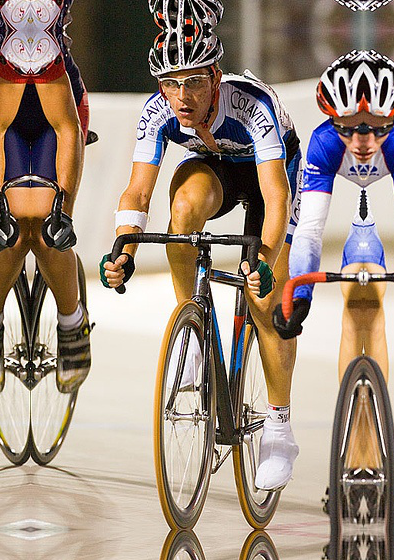

In [4]:
import torch
from torch.utils.data import Dataset, DataLoader
from skimage.external import tifffile
from PIL import Image
import numpy as np
# import matplotlib.pyplot as plt
from torchvision_multi import transform_multi
from torchvision_multi.datasets import image_loader


# fig = plt.figure(figsize=(20, 6))
# img_tif = tifffile.imread('./sample-data/7-channel.tif')
# img_tif_addnoise = transform_multi.noise(img_tif,16,0,0.001)
#
# img_jpg = Image.open('./sample-data/2007_000129.jpg')
# img_tif_addnoise = transform_multi.noise(img_tif,16)


batch_size = 2
transform = transform_multi.SegCompose([
#     transform_multi.SegRandomRotate(1),
#     transform_multi.SegRandomFlip(),
#     transform_multi.SegRandomCrop((300,300)),
#     transform_multi.SegRandomShift(1, 30, 30),
#       transform_multi.SegRandomNoise(1,8,0,0.0001),
        transform_multi.SegPad([(30,30),(30,30),(0,0)],"reflect"),
#       transform_multi.SegGaussianBlur(1),
#     transform_multi.SegPieceTransfor(1,warp_left_right=10,warp_up_down=10),
    transform_multi.SegToTensor()

#     transform_multi.Lambda(lambda x: transform_multi.to_tensor(x))
])

trainset = image_loader.SemanticSegmentationLoader(
    rootdir='./sample-data/', lstpath='./sample-data/segmentation.lst',
    filetype='png', transform=transform,
)

trainloader = DataLoader(dataset=trainset, batch_size=batch_size, shuffle=False)

for step, (inputs, targets) in enumerate(trainloader):
    #     print('batch: {} ........'.format(idx))
    #     print(type(images), images.shape)
    #     print(type(targets), targets.shape)

    # Variable, cuda
    # net feed forward
    # loss
    # back propagation

    # plot
    print(inputs.shape)
    for idx, item in enumerate(inputs):
        item = torch.squeeze(item, 0)
        img_ndarr = transform_multi.to_ndarray(item)
        # subplot = int(''.join(str(x) for x in [1, batch_size, idx + 1]))
        print(type(img_ndarr), img_ndarr.shape)
        img = Image.fromarray(img_ndarr)
        target = Image.fromarray(img_ndarr)
        # tifffile.imshow(img_ndarr[:, :, [3, 2, 1]], figure=fig, subplot=subplot)
    # plt.savefig('./sample-data/plot/{}.png'.format(step), bbox_inches='tight')
    print('\n')
    for idx, item in enumerate(targets):
        item = torch.squeeze(item, 0)
#         img_ndarr = transform_multi.to_ndarray(item)
        # subplot = int(''.join(str(x) for x in [1, batch_size, idx + 1]))
        print('target', type(item), item.shape)
        a = item.numpy()
        img_new = a.astype(np.uint8)
        target = Image.fromarray(img_new)
#         target = Image.fromarray(item)
        # tifffile.imshow(img_ndarr[:, :, [3, 2, 1]], figure=fig, subplot=subplot)
    # plt.savefig('./sample-data/plot/{}.png'.format(step), bbox_inches='tight')
    print('\n')
img

In [5]:
item.numpy().shape

(560, 394)

In [6]:
a = item.numpy()
img_new = a.astype(np.uint8)

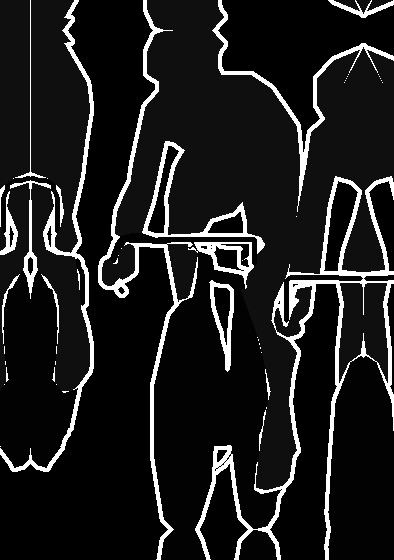

In [7]:
Image.fromarray(img_new)

In [8]:
img.save("mesh_trans.png",format==".png")

In [9]:

img=img_new
value = []
for i in range(np.array(img).shape[0]):
    for j in range(np.array(img).shape[1]):
        pixel = np.array(img)[i,j]
        if pixel not in value:
            value.append(pixel)
            
value

[15, 255, 0, 2]

In [10]:
img

array([[ 15,  15,  15, ...,  15,  15, 255],
       [ 15,  15,  15, ..., 255, 255, 255],
       [ 15,  15,  15, ..., 255, 255, 255],
       ..., 
       [  0,   0,   0, ...,   2,   2,   2],
       [  0,   0,   0, ...,   2,   2,   2],
       [  0,   0,   0, ...,   2,   2,   2]], dtype=uint8)

# tiff image

(500, 334) uint8
(560, 394) uint8


(500, 334) uint8
(560, 394) uint8


torch.Size([2, 7, 521, 693])
<class 'numpy.ndarray'> (521, 693, 7)
<class 'numpy.ndarray'> (521, 693, 7)




TypeError: Cannot handle this data type

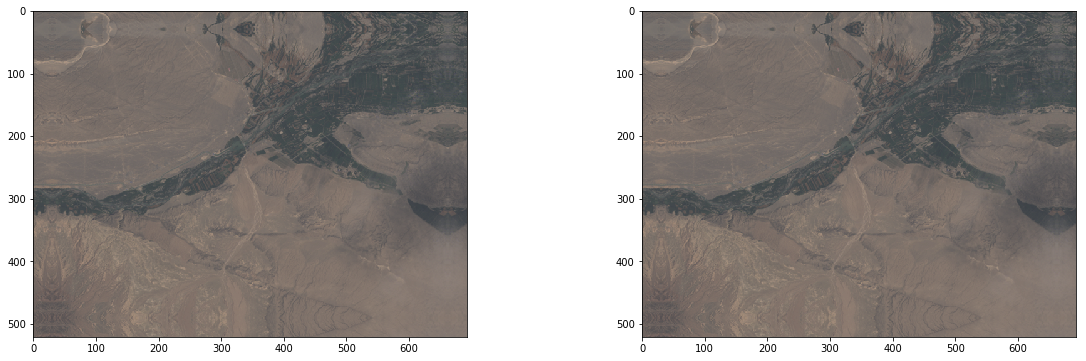

In [11]:
import torch
from torch.utils.data import Dataset, DataLoader
from skimage.external import tifffile
from PIL import Image
import numpy as np
# import matplotlib.pyplot as plt
from torchvision_multi import transform_multi
from torchvision_multi.datasets import image_loader


fig = plt.figure(figsize=(20, 6))
# img_tif = tifffile.imread('./sample-data/7-channel.tif')
# img_tif_addnoise = transform_multi.noise(img_tif,16,0,0.001)
#
# img_jpg = Image.open('./sample-data/2007_000129.jpg')
# img_tif_addnoise = transform_multi.noise(img_tif,16)


batch_size = 2
transform = transform_multi.SegCompose([
#     transform_multi.SegRandomRotate(1),
#     transform_multi.SegRandomFlip(),
       transform_multi.SegPad([(30,30),(30,30),(0,0)],"reflect"),
#     transform_multi.SegRandomCrop((400,10)), 
#     transform_multi.SegRandomShift(1, 30, 30),
#       transform_multi.SegRandomNoise(1,8,0,1),
#       transform_multi.SegGaussianBlur(1),
#     transform_multi.SegPieceTransfor(1,warp_left_right=30,warp_up_down=30),
    transform_multi.SegToTensor()

#     transform_multi.Lambda(lambda x: transform_multi.to_tensor(x))
])

trainset = image_loader.SemanticSegmentationLoader(
    rootdir='./sample-data/', lstpath='./sample-data/segmentation_tiff.lst',
    filetype='tif', transform=transform,
)
trainloader = DataLoader(dataset=trainset, batch_size=batch_size, shuffle=False)

for step, (inputs, targets) in enumerate(trainloader):
    #     print('batch: {} ........'.format(idx))
    #     print(type(images), images.shape)
    #     print(type(targets), targets.shape)

    # Variable, cuda
    # net feed forward
    # loss
    # back propagation

    # plot
    print(inputs.shape)
    for idx, item in enumerate(inputs):
        item = torch.squeeze(item, 0)
        img_ndarr = transform_multi.to_ndarray(item)
        subplot = int(''.join(str(x) for x in [1, batch_size, idx + 1]))
        print(type(img_ndarr), img_ndarr.shape)
#         img = Image.fromarray(img_ndarr)
#         target = Image.fromarray(img_ndarr)
        tifffile.imshow(img_ndarr[:, :, [3, 2, 1]], figure=fig, subplot=subplot)
    # plt.savefig('./sample-data/plot/{}.png'.format(step), bbox_inches='tight')
    print('\n')
    for idx, item in enumerate(targets):
        item = torch.squeeze(item, 0)
#         img_ndarr = transform_multi.to_ndarray(item)
        # subplot = int(''.join(str(x) for x in [1, batch_size, idx + 1]))
        item.numpy().dtype
        img = Image.fromarray(item.numpy())
        print(type(img), img.size)
#         target = Image.fromarray(img)
        # tifffile.imshow(img_ndarr[:, :, [3, 2, 1]], figure=fig, subplot=subplot)
    # plt.savefig('./sample-data/plot/{}.png'.format(step), bbox_inches='tight')
    print('\n')
img